<h1> Comparativo dos Métodos Numéricos de Runge-Kutta e Euler</h1>

<h2> Análise Numérica </h2> 

<p> Ana Clara Santos Brandão</p>

In [1]:
# IMPORTS 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
# CONSTANTES 

h = 1
lambda_= 0.1

<h3> Modelo de Malthus</h3>

In [3]:
# FUNÇÕES 

def modelo_malthus(t, lam):  
    
    x = []
    
    lis = list(range(0, len(t)))
    
    for i in lis:
        x_ = 0.5 * np.exp(lam* i)
        x.append(x_)

    return x

def euler_malthus(lam, h, t):
    
    x = []
    
    lis = list(range(0, len(t)))
    
    for i in lis:

        funcao_x = 0.5 * np.exp(lam*i)
        funcao_x_linha = lam * funcao_x
        
        x_ = funcao_x + h * funcao_x_linha
        x.append(x_)
              
    return x

def runge_kutta_malthus(lam, h, t):
    
    a = h/2
    x = [0.5]
    
    for i in range(len(t)-1):
      
        funcao_x = 0.5 * np.exp(lam*i)
        f_linha = lambda x: lam * x
        funcao_x_linha = lam * x[i]

        K1 = funcao_x_linha
        K2 = f_linha(x[i] + a *K1)
        K3 = f_linha(x[i] + a *K2)
        K4 = f_linha(x[i] + h *K3)

        x_ = funcao_x + (h/6) * (K1 + 2*K2 + 2*K3 + K4)
        
        x.append(x_)
        
    return x

In [4]:
# APLICANDO AS FUNÇÕES 

t = list(range(0, 100))

M1 = modelo_malthus(t, lambda_) # solução analítica 
M2 = euler_malthus(lambda_, h, t) # solução numérica segundo Euler 
M3 = runge_kutta_malthus(lambda_, h, t) # solução numérica segundo Runger-Kutta

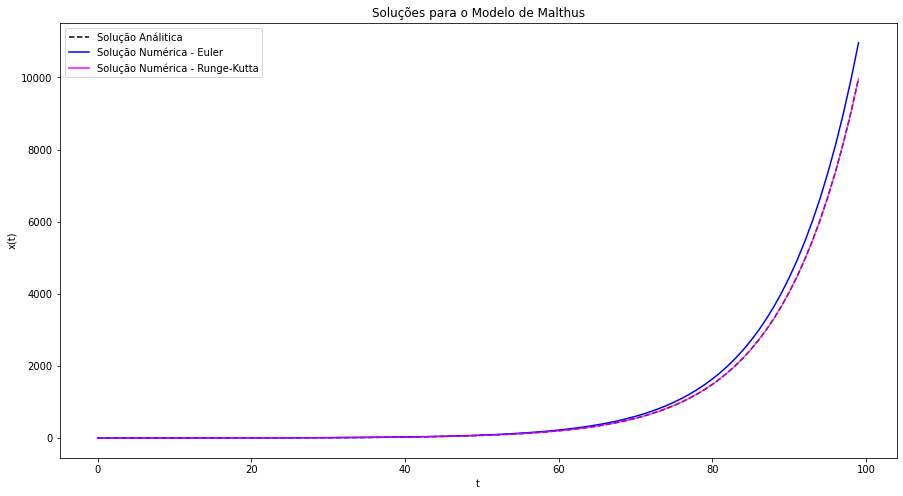

In [5]:
# VISUALIZAÇÃO GRÁFICA

# Plot da Figura 
fig = plt.figure(figsize=(15,8))

# Criar primeiro conjunto de dados da pressão do Methanol
plt.plot(t, M1, linestyle='--', label="Solução Análitica", color = 'black', alpha=1) # Colocar a linha do conjunto de dados


plt.plot(t, M2, linestyle='solid', label="Solução Numérica - Euler", color = 'blue', alpha=1) # Colocar a linha do conjunto de dados


plt.plot(t, M3, linestyle='solid', label="Solução Numérica - Runger-Kutta", color = 'fuchsia', alpha=0.7) # Colocar a linha do conjunto de dados
#plt.text(0.4, 10, "Solução Numérica - Runger-Kutta")

legend_elements = [Line2D([0], [0],linestyle='--', color='black', label='Solução Análitica'),
                   Line2D([0], [0], color='blue', label='Solução Numérica - Euler'),
                  Line2D([0], [0], color='fuchsia', label= 'Solução Numérica - Runge-Kutta')]

plt.legend(handles=legend_elements)

# Criar título central e título dos eixos
plt.title("Soluções para o Modelo de Malthus")
plt.xlabel("t")
plt.ylabel("x(t)")


# Plotar todo o gráfico com os comandos determinados anteriormente
plt.show()

<h3> Modelo de Verhulst </h3>

In [6]:
# FUNÇÕES 

def modelo_verhulst(lam, t):
    
    c = 1
    x = []
    
    lis = list(range(0, len(t)))
    
    for i in lis:
        x_ = c * np.exp(lam * i) / (1 + c * np.exp(lam * i))
        x.append(x_)
                 
    return x

def euler_verhulst(lam, h, t):
    
    x = []
    c = 1
    
    lis = list(range(0, len(t)))
    
    for i in lis:
        funcao_x = (c * np.exp(lam * i)) / (1 + c * np.exp(lam * i))
        funcao_x_linha = lam * funcao_x * (1 - funcao_x)
        
        x_ = funcao_x + h * funcao_x_linha
        x.append(x_)     
        
    return x

def runge_kutta_verhulst(lam, h, t):

    a = h/2
    x = [0.5]
    c = 1
    
    for i in range(len(t)-1):
        
        funcao_x = (c * np.exp(lam * i)) / (1 + c * np.exp(lam * i))
        f_linha = lambda x: lam * x * (1 - x)
        funcao_x_linha = lam * x[i] * (1 - x[i])
        
        K1 = funcao_x_linha
        K2 = f_linha(x[i] + a *K1)
        K3 = f_linha(x[i] + a *K2)
        K4 = f_linha(x[i] + h *K3)

        x_ = funcao_x + (h/6) * (K1 + 2*K2 + 2*K3 + K4)

        x.append(x_)

    return x

In [7]:
# APLICANDO FUNÇÕES 

t = list(range(0, 200))

V1 = modelo_verhulst(lambda_, t)
V2 = euler_verhulst(lambda_, h, t)
V3 = runge_kutta_verhulst(lambda_, h, t)

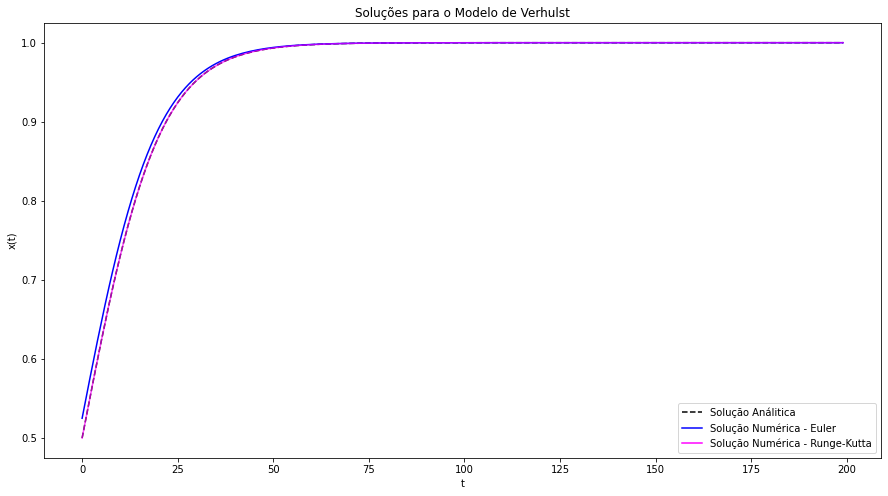

In [8]:
# VISUALIZAÇÃO GRÁFICA

# Plot da Figura 
fig = plt.figure(figsize=(15,8))


# Criar primeiro conjunto de dados da pressão do Methanol
plt.plot(t, V1, linestyle='--', label="Dados coletados", color = 'black', alpha=1) # Colocar a linha do conjunto de dados

plt.plot(t, V2, linestyle='solid', label="Dados coletados", color = 'blue', alpha=1) # Colocar a linha do conjunto de dados

plt.plot(t, V3, linestyle='solid', label="Dados coletados", color = 'fuchsia', alpha=0.7) # Colocar a linha do conjunto de dados


legend_elements = [Line2D([0], [0],linestyle='--', color='black', label='Solução Análitica'),
                   Line2D([0], [0], color='blue', label='Solução Numérica - Euler'),
                  Line2D([0], [0], color='fuchsia', label= 'Solução Numérica - Runge-Kutta')]

plt.legend(handles=legend_elements)
# Criar título central e título dos eixos
plt.title("Soluções para o Modelo de Verhulst")
plt.xlabel("t")
plt.ylabel("x(t)")


# Plotar todo o gráfico com os comandos determinados anteriormente
plt.show()

<h3> Modelo de Gompertz </h3>

In [9]:
# FUNÇÕES

def modelo_gompertz(lam, t):
    
    x = []
    
    
    for i in t:
        x_ = np.exp(-np.log(2)*np.exp(-lam * i))
        x.append(x_)
        
    return x 

def euler_gompertz(lam, h, t):
    
    x = []
    
    for i in t:
        funcao_x = np.exp(-np.log(2)*np.exp(-lam * i))
        funcao_x_linha = lam * funcao_x * np.log(1 / funcao_x)
        
        x_ = funcao_x + h * funcao_x_linha
        x.append(x_)
        
    return x

def runge_kutta_gompertz(lam, h, t):
    
    a = h/2
    x = [0.5]
    
    for i in range(len(t)-1):
        
        funcao_x = np.exp(-np.log(2)*np.exp(-lam * i))
        f_linha = lambda x: lam * x * np.log(1 / x)
        funcao_x_linha = lam * x[i] * np.log(1 / x[i])
        
        K1 = funcao_x_linha
        K2 = f_linha(x[i] + a *K1)
        K3 = f_linha(x[i] + a *K2)
        K4 = f_linha(x[i] + h *K3)

        x_ = funcao_x + (h/6) * (K1 + 2*K2 + 2*K3 + K4)
        
        x.append(x_)
        
    return x

In [11]:
# APLICANDO FUNÇÕES 

t = list(range(0, 100))

G1 = modelo_gompertz(lambda_, t)
G2 = euler_gompertz(lambda_, h, t)
G3 = runge_kutta_gompertz(lambda_, h, t)

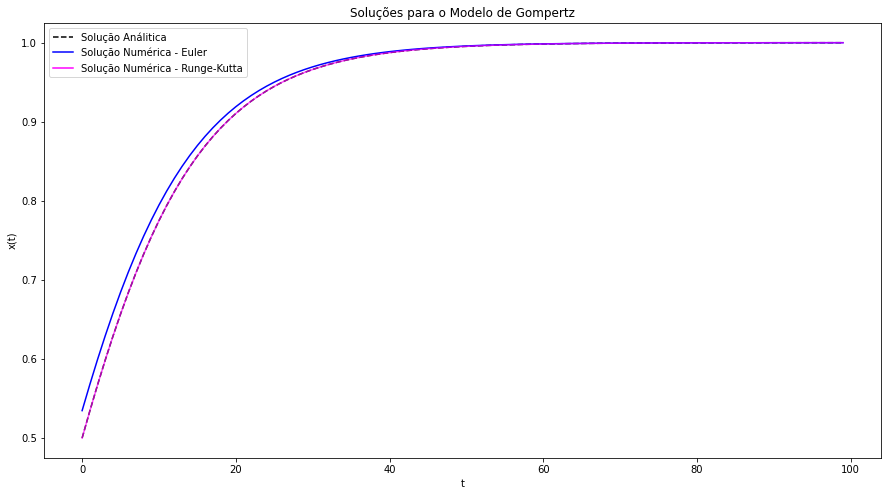

In [12]:
# VISUALIZAÇÃO GRÁFICA

# Plot da Figura 
fig = plt.figure(figsize=(15,8))

# Criar primeiro conjunto de dados da pressão do Methanol
plt.plot(t, G1, linestyle='--', label="Dados coletados", color = 'black', alpha=1) # Colocar a linha do conjunto de dados

plt.plot(t, G2, linestyle='solid', label="Dados coletados", color = 'blue', alpha=1) # Colocar a linha do conjunto de dados

plt.plot(t, G3, linestyle='solid', label="Dados coletados", color = 'fuchsia', alpha=0.7) # Colocar a linha do conjunto de dados

legend_elements = [Line2D([0], [0], linestyle='--', color='black', label='Solução Análitica'),
                   Line2D([0], [0], color='blue', label='Solução Numérica - Euler'),
                  Line2D([0], [0], color='fuchsia', label= 'Solução Numérica - Runge-Kutta')]

plt.legend(handles=legend_elements)
# Criar título central e título dos eixos
plt.title("Soluções para o Modelo de Gompertz")
plt.xlabel("t")
plt.ylabel("x(t)")


# Plotar todo o gráfico com os comandos determinados anteriormente
plt.show()